In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def gradiente(A, x, b):
    r = b-A@x
    k = 0
    evol = []
    res = []
    while np.linalg.norm(r)>1e-8:
        r = b-A@x
        alpha = (r.T@r)/(r.T@A@r)
        x = x + alpha*r        
        k = k+1
        evol.append(np.linalg.norm(x))
        res.append(np.linalg.norm(r))
    return x, k, evol, res

In [10]:
A = np.array([[1,2,3],[4,5,6],[7,8,9]])
A = A.T@A
A = A + 2*np.eye(3)
np.linalg.eig(A)

EigResult(eigenvalues=array([285.85858658,   3.14141342,   2.        ]), eigenvectors=array([[-0.47967118, -0.77669099,  0.40824829],
       [-0.57236779, -0.07568647, -0.81649658],
       [-0.66506441,  0.62531805,  0.40824829]]))

In [11]:
x = np.array([0,0,0])
b = np.array([1,2,3])
x, k, evol, res = gradiente(A, x, b)
print(x, k, evol[-1], res[-1])


[-0.22828508 -0.0155902   0.19710468] 218 0.3020056017574249 8.766367981758861e-09


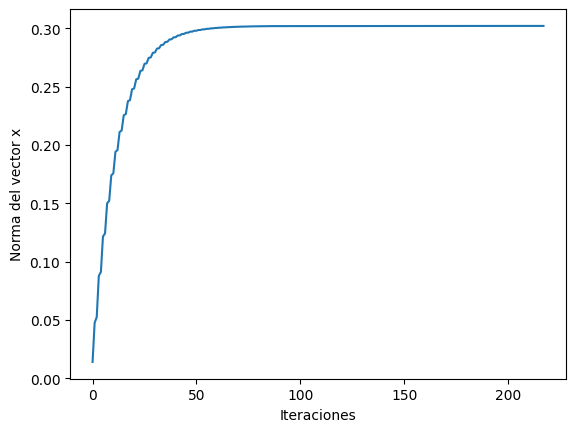

In [13]:
plt.plot(evol)
plt.xlabel('Iteraciones')
plt.ylabel('Norma del vector x')
plt.show()

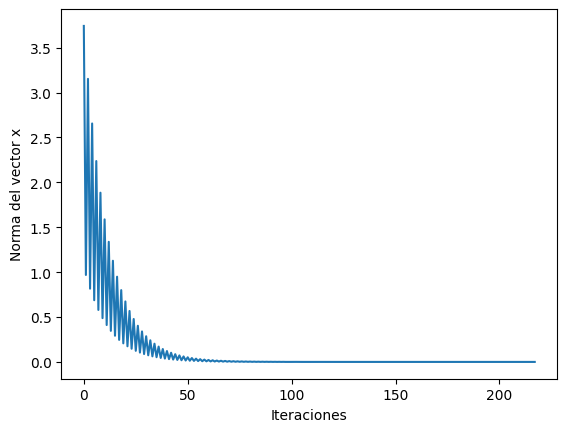

In [14]:
plt.plot(res)
plt.xlabel('Iteraciones')
plt.ylabel('Norma del vector x')
plt.show()

In [20]:
def gradiente_conj(A, x, b):
    r = b-A@x
    p = r
    k = 0
    evol = []
    res = []
    while np.linalg.norm(r)>1e-8:       
        alpha = (r.T@p)/(p.T@A@p)
        x = x + alpha*r
        r = b-A@x
        beta = - (p.T@r)/(p.T@A@p)
        p = r + beta*p        
        k = k+1
        evol.append(np.linalg.norm(x))
        res.append(np.linalg.norm(r))
    return x, k, evol, res

In [25]:
A = np.array([[1,2,3],[4,5,6],[7,8,9]])
A = A.T@A
A = A + 2*np.eye(3)
np.linalg.eig(A)
x = np.array([0,0,0])
b = np.array([1,2,3])
x, k, evol, res = gradiente_conj(A, x, b)
print(x, k, evol[-1], res[-1])

[-0.22828508 -0.0155902   0.19710468] 217 0.3020056013637514 8.766342397988454e-09
